In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel("./Nespresso.xlsx")


In [3]:
df.head()

,Дата,Время,Сохранено,Заголовок,Текст,Тип поста,URL,Тональность,Автор,Профиль,...,Комментарии,Репосты,Просмотры,Рейтинг,URL изображения,Назначено,Обработано,Аспекты,Тематика,Автокатегория
0,30.06.2022,23:46,01.07.2022 22:28,"Вкусный кофе Набор кофе в капсулах ""Сливочный""...",Вкусный кофе! Беру не первый раз,Пост,NaN,Позитивная,Юлия,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,Нет,Вкус_Позитивная,Еда,"WOM,Мнение"
1,30.06.2022,23:10,02.07.2022 01:49,Coffesso Подарочный набор кофе в капсулах для ...,Прекрасный кофе! Все понравилось!,Пост,NaN,Позитивная,Тамара,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,Нет,NaN,Еда,"WOM,Мнение"
2,30.06.2022,22:34,02.07.2022 04:13,❗❗❗ НЕ ПЛАТИ ОНЛАЙН НИКОГДА №7358 от 30.06.202...,"⚠ Просьба: не делайте ставку, если не планируе...",Комментарий,NaN,Негативная,БАЙТ ВОРОНЕЖ КУПИТЬ ТЕЛЕВИЗОРЫ НЕДОРОГО,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Сервис_Нейтральная,NaN,WOM
3,30.06.2022,22:34,02.07.2022 04:13,❗❗❗ НЕ ПЛАТИ ОНЛАЙН НИКОГДА №7358 от 30.06.202...,❗ Оплата только по факту получения товара в оф...,Комментарий,NaN,Негативная,БАЙТ ВОРОНЕЖ КУПИТЬ ТЕЛЕВИЗОРЫ НЕДОРОГО,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Сервис_Нейтральная,NaN,"WOM,Официальный ответ"
4,30.06.2022,21:40,01.07.2022 13:31,"Veronese Кофе в капсулах Сreme brulee, для сис...","Не очень крепкий, не на каждый день, но вкусно.",Пост,NaN,Позитивная,Ольга,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,Нет,Вкус_Позитивная,Еда,"WOM,Мнение"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Дата                         26074 non-null  object 
 1   Время                        26074 non-null  object 
 2   Сохранено                    26074 non-null  object 
 3   Заголовок                    24428 non-null  object 
 4   Текст                        26074 non-null  object 
 5   Тип поста                    26074 non-null  object 
 6   URL                          0 non-null      float64
 7   Тональность                  26074 non-null  object 
 8   Автор                        26020 non-null  object 
 9   Профиль                      0 non-null      float64
 10  Подписчики                   7116 non-null   float64
 11  Демография                   20765 non-null  object 
 12  Возраст                      1975 non-null   float64
 13  Источник        

In [5]:
my_df=df.drop(columns=['Время', 'Сохранено', 'URL', 'Автор', 'Возраст', 'Профиль', 'Подписчики', 'Место публикации', \
                       'Профиль места публикации', 'Подписчики места публикации', 'Страна', 'Город', 'Заметки', \
                       'Сумма всех реакций', 'Лайки', 'Love', 'Haha', 'Wow', 'Sad', 'Angry', 'Dislikes', 'Комментарии', \
                       'Репосты', 'Просмотры', 'URL изображения', 'Назначено', 'Обработано'])
#удаляем столбцы, в которых очень мало данных

In [6]:
my_df.rename(columns={'Дата':'data', 'Заголовок':'title','Текст':'text', 'Тип поста':'type', 'Тональность':'mood', 'Демография':'sex', \
                      'Источник':'source', 'Тип источника':'type_source', 'Регион':'region', 'Рейтинг':'rating', \
                      'Аспекты':'aspect', 'Тематика':'subject', 'Автокатегория':'auto_category'}, inplace=True)
#переименовываем, для удобства

In [7]:
my_df.data = pd.to_datetime(my_df.data, dayfirst=True) #переводим столбец Дата, в формат Даты
my_df.auto_category=my_df.auto_category.apply(lambda x: x.split(',')[-1]) # обрезаем повторяющиеся в каждой строке символы
#my_df=my_df[my_df['title'].str.contains(r'\bкапсул|кофе|nespresso|неспрессо', case=False, na=False)] #фильтруем каждую строку на упоминание \
# о продукте, чтобы отсеять ложную информацию
my_df.head()


,data,title,text,type,mood,sex,source,type_source,region,rating,aspect,subject,auto_category
0,2022-06-30,"Вкусный кофе Набор кофе в капсулах ""Сливочный""...",Вкусный кофе! Беру не первый раз,Пост,Позитивная,Женщина,wildberries.ru,Отзывы,NaN,5.0,Вкус_Позитивная,Еда,Мнение
1,2022-06-30,Coffesso Подарочный набор кофе в капсулах для ...,Прекрасный кофе! Все понравилось!,Пост,Позитивная,Женщина,wildberries.ru,Отзывы,NaN,5.0,NaN,Еда,Мнение
2,2022-06-30,❗❗❗ НЕ ПЛАТИ ОНЛАЙН НИКОГДА №7358 от 30.06.202...,"⚠ Просьба: не делайте ставку, если не планируе...",Комментарий,Негативная,Сообщество,vk.com,Соц. сеть,Воронежская область,NaN,Сервис_Нейтральная,NaN,WOM
3,2022-06-30,❗❗❗ НЕ ПЛАТИ ОНЛАЙН НИКОГДА №7358 от 30.06.202...,❗ Оплата только по факту получения товара в оф...,Комментарий,Негативная,Сообщество,vk.com,Соц. сеть,Воронежская область,NaN,Сервис_Нейтральная,NaN,Официальный ответ
4,2022-06-30,"Veronese Кофе в капсулах Сreme brulee, для сис...","Не очень крепкий, не на каждый день, но вкусно.",Пост,Позитивная,Женщина,wildberries.ru,Отзывы,NaN,5.0,Вкус_Позитивная,Еда,Мнение


In [8]:
my_df.shape

(26074, 13)

In [9]:
df_data=my_df.resample('D', on ='data').sum().reset_index() #считаем количесвто упоминаий по дням
df_data.rename(columns={"rating":"count_mentions"}, inplace=True) #переименовываем колонку для удобства
df_data.sort_values(['count_mentions'], ascending=False) #сортируем по убыванию коментариев

,data,count_mentions
40,2022-04-10,656.0
49,2022-04-19,653.0
77,2022-05-17,652.0
47,2022-04-17,615.0
21,2022-03-22,605.0
...,...,...
114,2022-06-23,108.0
109,2022-06-18,94.0
115,2022-06-24,91.0
116,2022-06-25,84.0


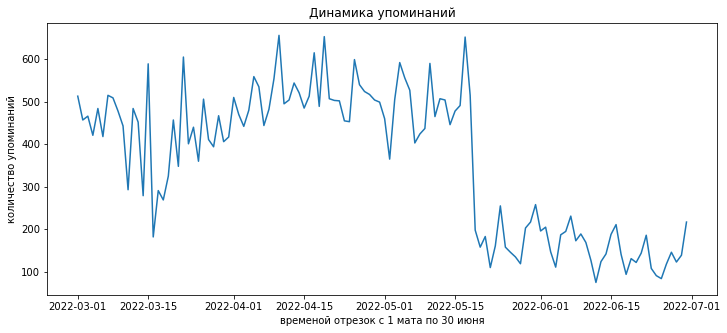

In [10]:
plt.figure(figsize = (12,5))
sns.lineplot(x = 'data', y = 'count_mentions', data = df_data)
plt.title('Динамика упоминаний')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('mention dynamics.png', facecolor='white')
#строим график 

In [11]:
#из графика видно, что количество упоминаний, после середины мая, резко упало
#данный график отражает общее упоминание о кофе системы Nespresso
#и эти данные нельзя расценивать как упоминания только о бренде Nespresso
#потому что во всем датасете идет речь о капсулах или кофемашинах по системе Nespresso, разных брендов


In [12]:
#сгруппируем данные по дате и по настроению коментария
df_mood= my_df.groupby(['data', 'mood'], as_index=False).sum()
df_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_mood=df_mood.sort_values(['count_mentions'], ascending=False)
df_mood

,data,mood,count_mentions
233,2022-05-17,Позитивная,570.0
149,2022-04-19,Позитивная,535.0
143,2022-04-17,Позитивная,535.0
44,2022-03-15,Позитивная,530.0
122,2022-04-10,Позитивная,515.0
...,...,...,...
259,2022-05-26,Нейтральная,4.0
285,2022-06-04,Негативная,2.0
283,2022-06-03,Нейтральная,0.0
349,2022-06-25,Нейтральная,0.0


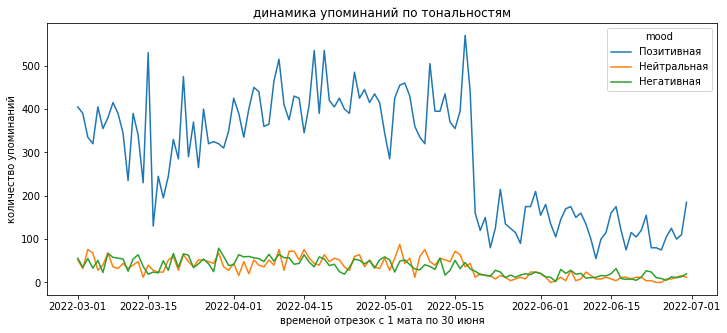

In [13]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональностям')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('dynamics of mentions by tone.png', facecolor='white')

In [14]:
#по графику явно видно, что позитивных комментариев люди оставляют гораздо больше
#на графике есть 2 резких скачка которые связаны с информацией об уходе бренда Nespresso с российского рынка 11 марта
#так же 18 мая информация о возвращении бренда Nespresso

In [15]:
my_df.sex.value_counts()


Женщина       11087
Мужчина        6997
Сообщество     2681
Name: sex, dtype: int64

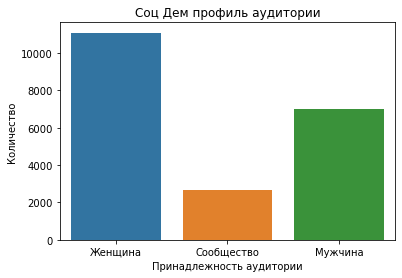

In [16]:
sns.countplot(x='sex', data=my_df)
plt.title('Соц Дем профиль аудитории')
plt.xlabel('Принадлежность аудитории')
plt.ylabel('Количество')
plt.savefig('social dem profile.png', facecolor='white')

In [17]:
#Женщин в 1,5 раз больше чем мужчин

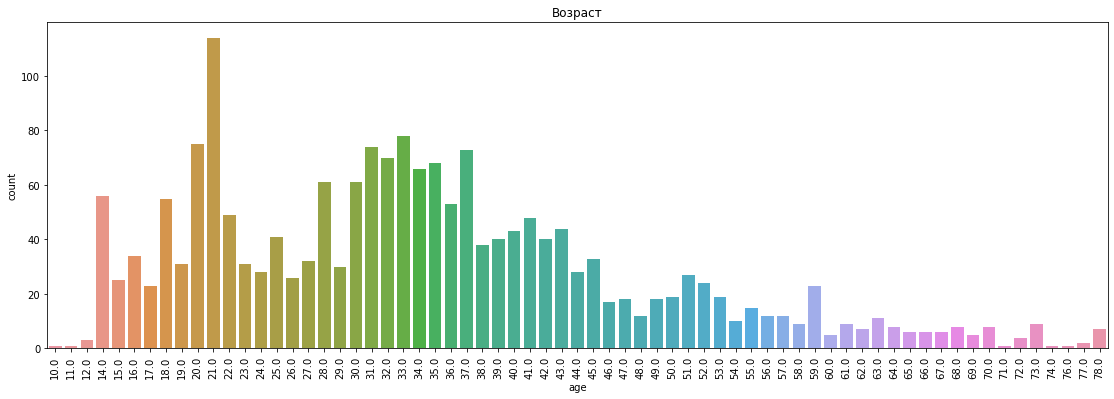

In [363]:
plt.figure(figsize=(19,6))
sns.countplot(data=df_age, x='age')
plt.xticks(rotation=90)
plt.title('Возраст')
plt.savefig('age.png', bbox_inches = "tight" , facecolor='white')

In [42]:
df_region=my_df.region.value_counts().reset_index().rename(columns={'index':'region', 'region':'count'})
df_region=df_region.loc[df_region['count'] > 50]
df_region
#данные пользователей по регионам

,region,count
0,Москва,2522
1,Санкт-Петербург,840
2,Московская область,193
3,Свердловская область,186
4,Нижегородская область,123
5,Новосибирская область,100
6,Краснодарский край,98
7,Воронежская область,95
8,Ростовская область,70
9,Калининградская область,65


In [18]:
#сгруппируем данные для определение популярного источника
df_source= my_df.groupby(['source'], as_index=False) \
    .agg({'text':'count'}) \
    .rename(columns={'text':"count"}) \
    .sort_values('count', ascending=False)
df_source=df_source.loc[df_source['count'] >= 10] #отфильтруем сточники где меньше 10 упоминаний

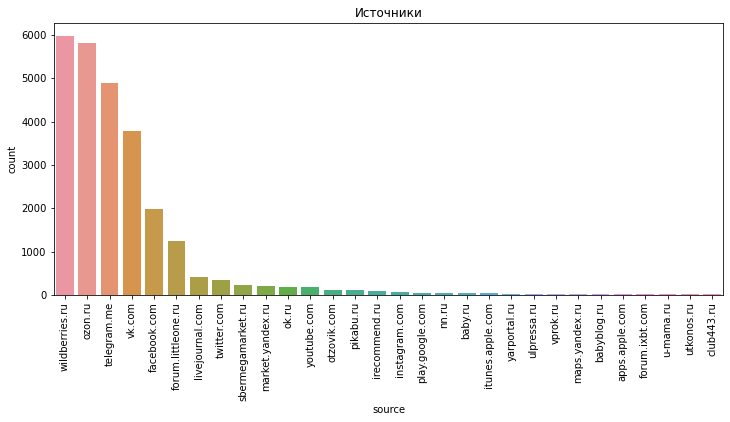

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_source, x='source', y='count')
plt.title('Источники')
plt.xticks(rotation=90)
plt.savefig('source.png', bbox_inches = "tight" , facecolor='white')

In [20]:
#лидирующими источниками стали 2 маркетплейса wildbirries.ru и ozon.ru


In [21]:
my_df.rating.value_counts() #количество оценок, рейтинга продукта системы Nespresso

5.0    7179
4.0    1044
3.0     891
1.0     774
2.0     424
Name: rating, dtype: int64

In [22]:
df_rating=my_df.groupby(["rating", "sex"], as_index=False) \
    .agg({'text':'count'}) \
    .rename(columns={"text":'count'}) 
df_rating   

,rating,sex,count
0,1.0,Женщина,528
1,1.0,Мужчина,179
2,2.0,Женщина,278
3,2.0,Мужчина,89
4,3.0,Женщина,584
5,3.0,Мужчина,194
6,4.0,Женщина,647
7,4.0,Мужчина,238
8,5.0,Женщина,4843
9,5.0,Мужчина,1436


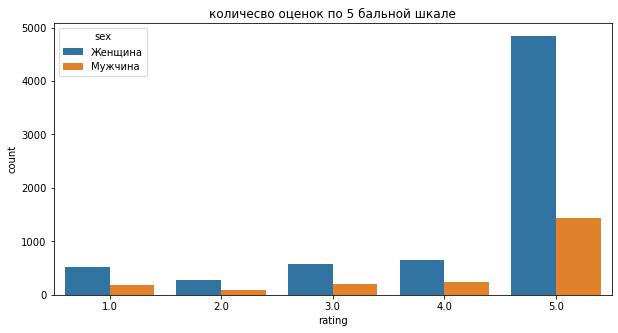

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data= df_rating, x="rating", y="count", hue='sex')
plt.title('количесво оценок по 5 бальной шкале')
plt.savefig('rating.png', facecolor='white')

In [24]:
# данный график отображает количество выставленных оценок  мужчинами и женщинами по 5 бальной шкале.
#данные были учтены только из маркетплейсов(т.к только там можно поставить оценку)
#форумы, блоги и соц.сети не вошли данные для подсчета, т.к показатели отсутствуют

In [25]:
my_df.auto_category.value_counts()

Мнение                 11628
WOM                     9184
Официальный ответ       2268
Вопрос                  1342
Рекомендация             884
Сравнение                642
Жалоба                   105
Промо                     17
Вакансии                   2
Инструкции                 1
Благотворительность        1
Name: auto_category, dtype: int64

In [26]:
category_percentage=my_df.auto_category.value_counts(normalize=True).mul(100).round(2)
category_percentage
#расчет категорий в процентах

Мнение                 44.60
WOM                    35.22
Официальный ответ       8.70
Вопрос                  5.15
Рекомендация            3.39
Сравнение               2.46
Жалоба                  0.40
Промо                   0.07
Вакансии                0.01
Инструкции              0.00
Благотворительность     0.00
Name: auto_category, dtype: float64

In [9]:
#сгруппируем данные по авто-категории
df_category=my_df.groupby(['auto_category'], as_index=False) \
    .agg({'text':'count'}) \
    .rename(columns={'text':'count'}) \
    .sort_values(['count'], ascending=False)
df_category.auto_category = df_category.auto_category.replace('WOM','Нет категории') 
#переименуем значение, на более верное по смыслу
df_category

,auto_category,count
6,Мнение,11628
0,Нет категории,9184
7,Официальный ответ,2268
3,Вопрос,1342
9,Рекомендация,884
10,Сравнение,642
4,Жалоба,105
8,Промо,17
2,Вакансии,2
1,Благотворительность,1


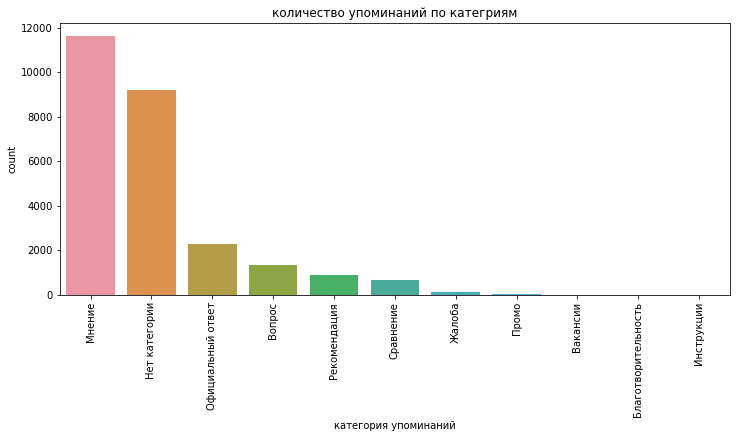

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(data= df_category, x='auto_category', y= 'count')
plt.xticks(rotation=90)
plt.title('количество упоминаний по категриям')
plt.xlabel('категория упоминаний')
plt.savefig('category.png',  bbox_inches = "tight", facecolor='white')

In [ ]:
                                   #поиск конкурентов и их краткий анализ

In [31]:
                                   #поиск конкурентов и их краткий анализ

In [32]:
df_jacobs=my_df[my_df['title'].str.contains(r'\bjacobs', case=False, na=False)]
df_jacobs.shape
# нашли 366 упоминаний бренда Jacobs

(366, 13)

In [33]:
df_jacobs_mood= df_jacobs.groupby(['data', 'mood'], as_index=False).sum()
df_jacobs_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_jacobs_mood=df_jacobs_mood.sort_values(['count_mentions'], ascending=False)
df_jacobs_mood

,data,mood,count_mentions
86,2022-05-10,Позитивная,65.0
49,2022-04-19,Позитивная,60.0
65,2022-04-27,Позитивная,55.0
57,2022-04-22,Позитивная,55.0
36,2022-04-13,Позитивная,45.0
...,...,...,...
121,2022-05-31,Нейтральная,0.0
111,2022-05-24,Негативная,0.0
78,2022-05-05,Негативная,0.0
118,2022-05-30,Нейтральная,0.0


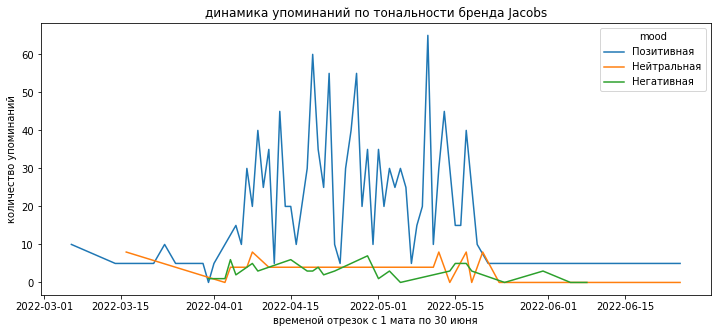

In [34]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_jacobs_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда Jacobs')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('jacobs', facecolor='white')

In [185]:
jacobs_rating=df_jacobs.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
jacobs_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,265
1,4.0,32
2,3.0,19
3,1.0,7
4,2.0,5


In [37]:
### Бренд Jacobs

In [38]:
df_coffesso=my_df[my_df['title'].str.contains(r'\bcoffesso', case=False, na=False)]
df_coffesso.shape
#нашли 457 упоминаний бренда Coffesso

(457, 13)

In [44]:
df_coffesso_mood= df_coffesso.groupby(['data', 'mood'], as_index=False).sum()
df_coffesso_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_coffesso_mood=df_coffesso_mood.sort_values(['count_mentions'], ascending=False)
df_coffesso_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
208,2022-06-30,Позитивная,55.0
99,2022-05-04,Позитивная,40.0
205,2022-06-29,Позитивная,35.0
202,2022-06-27,Позитивная,35.0
188,2022-06-21,Позитивная,35.0


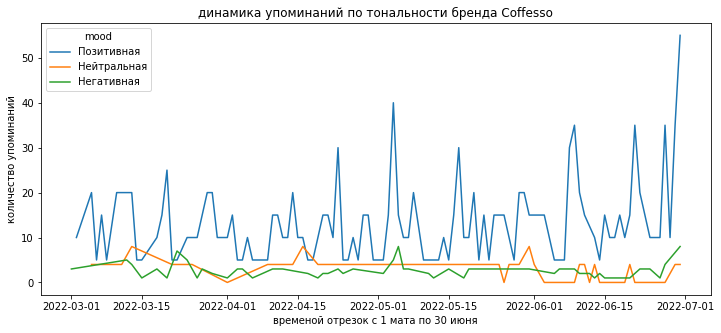

In [40]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_coffesso_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда Coffesso')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('coffesso.png', facecolor='white')

In [89]:
coffesso_rating=df_coffesso.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
coffesso_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,287
1,4.0,35
2,1.0,33
3,3.0,29
4,2.0,10


In [43]:
df_lavazza=my_df[my_df['title'].str.contains(r'\blavazza', case=False, na=False)]
df_lavazza.shape
#нашлось 138 упоминаний о бренде Lavazza

(138, 13)

In [46]:
df_lavazza_mood= df_lavazza.groupby(['data', 'mood'], as_index=False).sum()
df_lavazza_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_lavazza_mood=df_lavazza_mood.sort_values(['count_mentions'], ascending=False)
df_lavazza_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
6,2022-04-12,Нейтральная,8.0
23,2022-05-12,Позитивная,5.0
2,2022-03-15,Позитивная,5.0
4,2022-04-07,Позитивная,5.0
39,2022-06-13,Позитивная,5.0


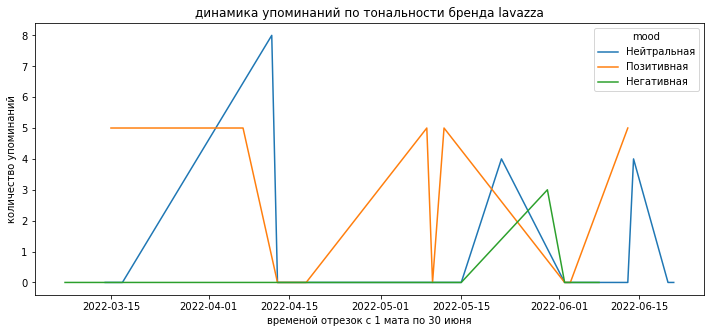

In [447]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_lavazza_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда lavazza')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('lavazza.png', facecolor='white')

In [90]:
lavazza_raing=df_lavazza.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
lavazza_raing
#колличсевто оценок Рейтинга

,rating,count
0,5.0,5
1,4.0,4
2,3.0,1


In [48]:
df_starbucks=my_df[my_df['title'].str.contains(r'\bstarbucks', case=False, na=False)]
df_starbucks.shape
#нашлось 1342 упоминаниz о бренде Starbucks

(1342, 13)

In [49]:
df_starbucks_mood= df_starbucks.groupby(['data', 'mood'], as_index=False).sum()
df_starbucks_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_starbucks_mood=df_starbucks_mood.sort_values(['count_mentions'], ascending=False)
df_starbucks_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
42,2022-03-15,Позитивная,335.0
71,2022-03-26,Позитивная,120.0
73,2022-03-27,Позитивная,110.0
12,2022-03-05,Позитивная,100.0
21,2022-03-08,Позитивная,95.0


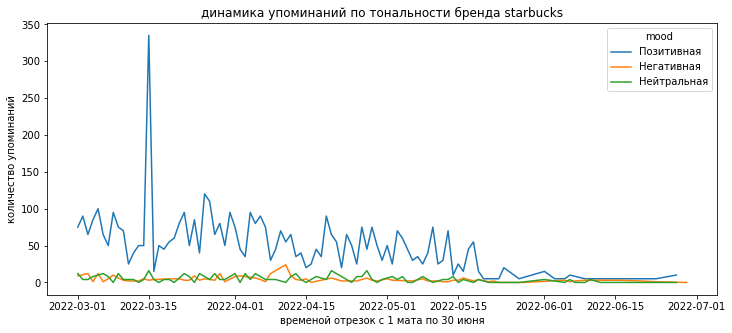

In [50]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_starbucks_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда starbucks')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('starbucks.png', facecolor='white')

In [91]:
starbucks_rating=df_starbucks.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
starbucks_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,972
1,4.0,104
2,3.0,65
3,1.0,58
4,2.0,25


In [52]:
df_lor=my_df[my_df['title'].str.contains(r"\bL'Or", case=False, na=False)]
df_lor.shape
#нашлось 597 упоминаний о бренде L'Or

(597, 13)

In [53]:
df_lor_mood= df_lor.groupby(['data', 'mood'], as_index=False).sum()
df_lor_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_lor_mood=df_lor_mood.sort_values(['count_mentions'], ascending=False)
df_lor_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
63,2022-04-17,Позитивная,80.0
124,2022-05-13,Позитивная,80.0
45,2022-04-09,Позитивная,80.0
105,2022-05-05,Позитивная,75.0
94,2022-04-30,Позитивная,70.0


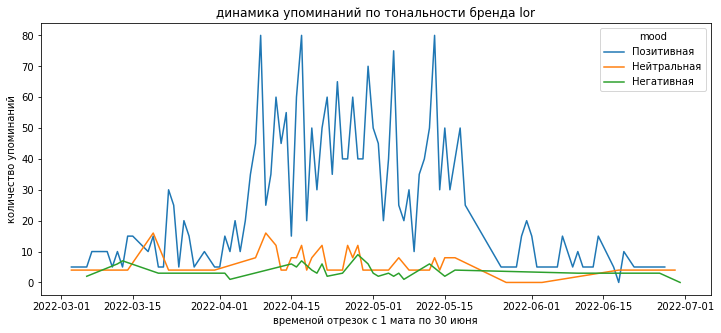

In [54]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_lor_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда lor')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('lor.png', facecolor='white')

In [92]:
lor_rating=df_lor.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
lor_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,474
1,4.0,63
2,3.0,28
3,2.0,11
4,1.0,11


In [61]:
df_cafilas=my_df[my_df['title'].str.contains(r"\bcafilas", case=False, na=False)]
df_cafilas.shape
#нашлось 290 упоминаний о бренде Cafilas

(290, 13)

In [62]:
df_cafilas_mood= df_cafilas.groupby(['data', 'mood'], as_index=False).sum()
df_cafilas_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_cafilas_mood=df_cafilas_mood.sort_values(['count_mentions'], ascending=False)
df_cafilas_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
173,2022-06-30,Позитивная,20.0
155,2022-06-16,Позитивная,20.0
64,2022-04-19,Позитивная,20.0
24,2022-03-24,Позитивная,20.0
109,2022-05-10,Позитивная,20.0


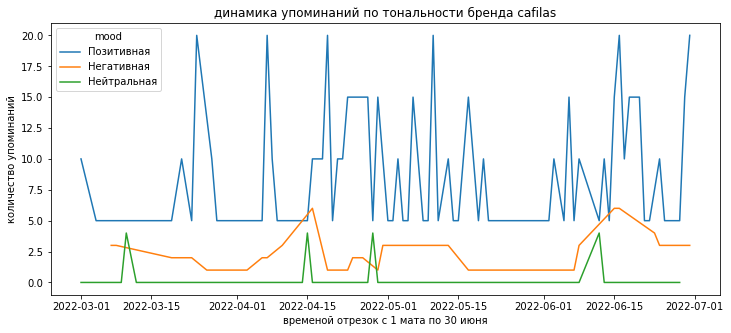

In [63]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_cafilas_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда cafilas')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('cafilas.png', facecolor='white')

In [93]:
cafilas_rating=df_cafilas.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
cafilas_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,160
1,3.0,14
2,1.0,11
3,2.0,8
4,4.0,4


In [65]:
df_rosso=my_df[my_df['title'].str.contains(r"\brosso caffe", case=False, na=False)]
df_rosso.shape
#нашлось 133 упоминаний о бренде Rosso caffe

(133, 13)

In [66]:
df_rosso_mood= df_rosso.groupby(['data', 'mood'], as_index=False).sum()
df_rosso_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_rosso_mood=df_rosso_mood.sort_values(['count_mentions'], ascending=False)
df_rosso_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
33,2022-04-03,Позитивная,25.0
42,2022-04-11,Позитивная,15.0
3,2022-03-05,Позитивная,15.0
6,2022-03-07,Позитивная,15.0
31,2022-03-29,Позитивная,15.0


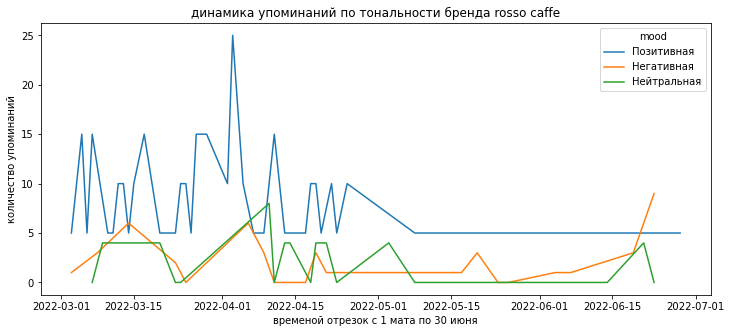

In [67]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_rosso_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда rosso caffe')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('rosso.png', facecolor='white')

In [94]:
rosso_rating=df_rosso.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
rosso_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,74
1,3.0,12
2,4.0,12
3,1.0,7
4,2.0,1


In [70]:
df_single=my_df[my_df['title'].str.contains(r"\bsingle", case=False, na=False)]
df_single.shape
#нашлось 869 упоминаний о бренде Single Cup Coffe

(869, 13)

In [71]:
df_single_mood= df_single.groupby(['data', 'mood'], as_index=False).sum()
df_single_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_single_mood=df_single_mood.sort_values(['count_mentions'], ascending=False)
df_single_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
108,2022-04-10,Позитивная,75.0
19,2022-03-07,Позитивная,50.0
8,2022-03-03,Позитивная,50.0
181,2022-05-10,Позитивная,50.0
110,2022-04-11,Позитивная,50.0


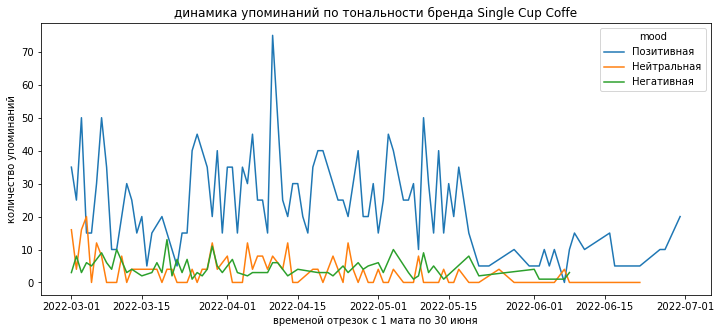

In [72]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_single_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда Single Cup Coffe')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('single.png', facecolor='white')

In [95]:
single_rating=df_single.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
single_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,457
1,4.0,68
2,3.0,53
3,1.0,47
4,2.0,31


In [74]:
df_jardin=my_df[my_df['title'].str.contains(r"\bjardin", case=False, na=False)]
df_jardin.shape
#нашлось 423 упоминаний о бренде Jardin

(423, 13)

In [75]:
df_jardin_mood= df_jardin.groupby(['data', 'mood'], as_index=False).sum()
df_jardin_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_jardin_mood=df_jardin_mood.sort_values(['count_mentions'], ascending=False)
df_jardin_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
39,2022-03-22,Позитивная,65.0
82,2022-04-10,Позитивная,45.0
45,2022-03-24,Позитивная,40.0
107,2022-04-24,Позитивная,40.0
9,2022-03-05,Позитивная,35.0


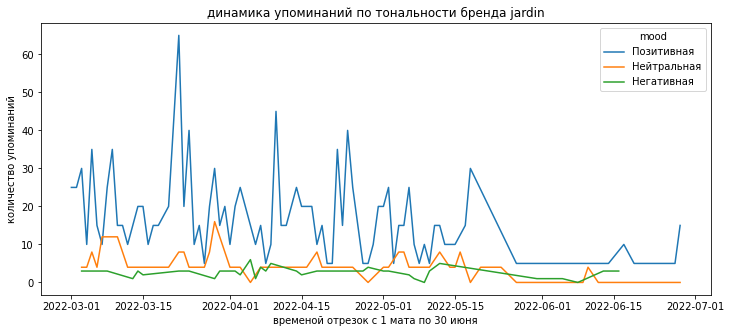

In [76]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_jardin_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда jardin')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('jardin.png', facecolor='white')

In [96]:
jardin_rating=df_jardin.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
jardin_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,287
1,4.0,60
2,3.0,28
3,1.0,10
4,2.0,8


In [78]:
df_vertuo=my_df[my_df['title'].str.contains(r"\bvertuo", case=False, na=False)]
df_vertuo.shape
#нашлось 564 упоминаний о бренде Vertuo

(564, 13)

In [79]:
df_vertuo_mood= df_vertuo.groupby(['data', 'mood'], as_index=False).sum()
df_vertuo_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_vertuo_mood=df_vertuo_mood.sort_values(['count_mentions'], ascending=False)
df_vertuo_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
124,2022-05-06,Позитивная,35.0
141,2022-05-14,Позитивная,35.0
188,2022-06-07,Позитивная,35.0
136,2022-05-12,Позитивная,30.0
178,2022-06-02,Позитивная,25.0


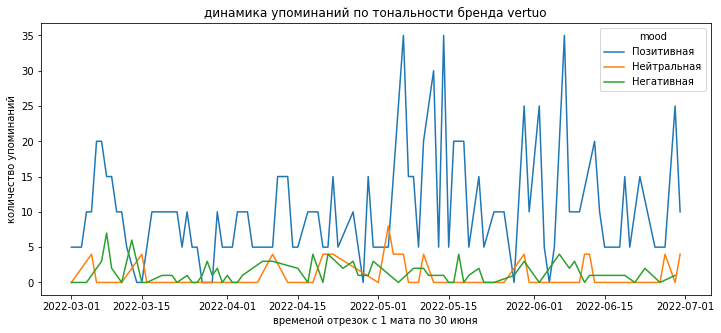

In [81]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_vertuo_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда vertuo')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('vertuo.png', facecolor='white')

In [97]:
vertuo_rating=df_vertuo.rating.value_counts().reset_index().rename(columns={'index':'rating', 'rating':'count'})
vertuo_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,193
1,1.0,37
2,4.0,15
3,3.0,13
4,2.0,12


In [83]:
df_homebarista=my_df[my_df['title'].str.contains(r"\bhome barista", case=False, na=False)]
df_homebarista.shape
#нашлось 466 упоминаний о бренде Home barista

(466, 13)

In [84]:
df_homebarista_mood= df_homebarista.groupby(['data', 'mood'], as_index=False).sum()
df_homebarista_mood.rename(columns={'rating':'count_mentions'}, inplace=True)
df_homebarista_mood=df_homebarista_mood.sort_values(['count_mentions'], ascending=False)
df_homebarista_mood.head()
#сгруппируем данные по дате и тональности упоминаний, далее построим график

,data,mood,count_mentions
18,2022-03-08,Позитивная,50.0
88,2022-04-06,Позитивная,35.0
69,2022-03-30,Позитивная,25.0
72,2022-03-31,Позитивная,25.0
21,2022-03-09,Позитивная,25.0


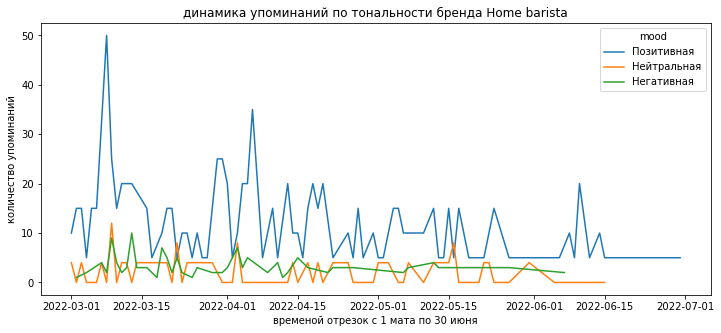

In [85]:
plt.figure(figsize = (12,5))
sns.lineplot(data=df_homebarista_mood, x="data", y='count_mentions', hue="mood")
plt.title('динамика упоминаний по тональности бренда Home barista')
plt.xlabel('временой отрезок с 1 мата по 30 июня')
plt.ylabel('количество упоминаний')
plt.savefig('homebarista.png', facecolor='white')

In [103]:
homebarista_rating=df_homebarista.rating.value_counts().reset_index() \
    .rename(columns={'index':'rating', 'rating':'count'}) 
homebarista_rating
#колличсевто оценок Рейтинга

,rating,count
0,5.0,192
1,1.0,44
2,4.0,35
3,3.0,26
4,2.0,10


In [ ]:
#сделаем таблицу рейтинга по компаниям, и построим график

In [187]:
rating_companies= starbucks_rating.merge(single_rating, on='rating').merge(lor_rating, on='rating') \
    .rename(columns={'count_x':'starbucks', 'count_y':'single', 'count':'lor'})
rating_companies=rating_companies.merge(vertuo_rating, on='rating').merge(homebarista_rating, on='rating').merge(coffesso_rating, on='rating') \
    .rename(columns={'count_x':'vertuo', 'count_y':'homebarista', 'count':'coffesso'}) 
rating_companies=rating_companies.merge(jardin_rating, on='rating', how='left').rename(columns={'count':'jardin'})
rating_companies=rating_companies.merge(jacobs_rating, on='rating', how='left').rename(columns={'count':'jacobs'})
rating_companies=rating_companies.merge(cafilas_rating, on='rating', how='left').merge(rosso_rating, on='rating', how='left') \
    .rename(columns={'count_x':'cafilas', 'count_y':'rosso'}) 
rating_companies.sort_values("rating", ascending=False, inplace=True)
rating_companies


,rating,starbucks,single,lor,vertuo,homebarista,coffesso,jardin,jacobs,cafilas,rosso
0,5.0,972,457,474,193,192,287,287,265,160,74
1,4.0,104,68,63,15,35,35,60,32,4,12
2,3.0,65,53,28,13,26,29,28,19,14,12
4,2.0,25,31,11,12,10,10,8,5,8,1
3,1.0,58,47,11,37,44,33,10,7,11,7


In [188]:
res= rating_companies.transpose()
res= res.rename(columns=res.iloc[0])
companies_rating= res.drop(res.index[0])
companies_rating

,5.0,4.0,3.0,2.0,1.0
starbucks,972.0,104.0,65.0,25.0,58.0
single,457.0,68.0,53.0,31.0,47.0
lor,474.0,63.0,28.0,11.0,11.0
vertuo,193.0,15.0,13.0,12.0,37.0
homebarista,192.0,35.0,26.0,10.0,44.0
coffesso,287.0,35.0,29.0,10.0,33.0
jardin,287.0,60.0,28.0,8.0,10.0
jacobs,265.0,32.0,19.0,5.0,7.0
cafilas,160.0,4.0,14.0,8.0,11.0
rosso,74.0,12.0,12.0,1.0,7.0


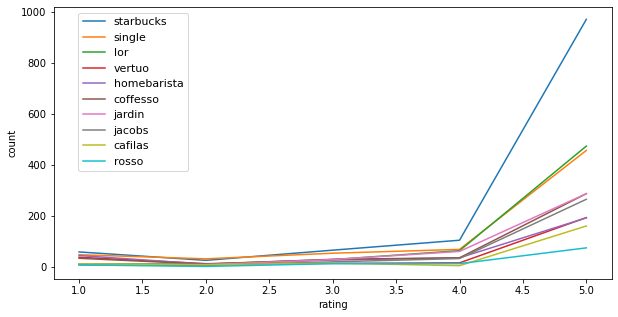

In [200]:
plt.figure(figsize=(10,5))
brends=['starbucks', 'single', 'lor', 'vertuo', 'homebarista', 'coffesso', 'jardin', 'jacobs', 'cafilas', 'rosso']
sns.lineplot(data=rating_companies, x='rating', y='starbucks')
sns.lineplot(data=rating_companies, x='rating', y='single')
sns.lineplot(data=rating_companies, x='rating', y='lor')
sns.lineplot(data=rating_companies, x='rating', y='vertuo')
sns.lineplot(data=rating_companies, x='rating', y='homebarista')
sns.lineplot(data=rating_companies, x='rating', y='coffesso')
sns.lineplot(data=rating_companies, x='rating', y='jardin')
sns.lineplot(data=rating_companies, x='rating', y='jacobs')
sns.lineplot(data=rating_companies, x='rating', y='cafilas')
sns.lineplot(data=rating_companies, x='rating', y='rosso')
plt.ylabel('count')
plt.legend(labels=brends, loc='upper right', fontsize=11, bbox_to_anchor=(0.25, 1))
plt.savefig('rating_companies.png', bbox_inches = "tight", facecolor='white')